In [26]:
#initial imports
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt

%matplotlib inline

## Australia household final consumption and expenditure (HCFE)

Data source (last accessed 29/10/2022)
https://www.abs.gov.au/statistics/economy/national-accounts/australian-national-accounts-national-income-expenditure-and-product/latest-release
Table 8 : Household final consumption exposure (HCFE) <br>
Series type: quarterly seasonally adjusted data <br>
Chain volume measures unit = $ millions <br>

### HCFE Data Checking and Cleaning
* import data in csv format into panda dataframe
* check data for missing values or duplicates
* remove duplicates if any
* if there is missing values, depending on volume consider remove, replace with average value or median value

In [2]:
#import quarterly spending data into pd.Dataframe and display the first 5 rows
df_hfce = pd.read_csv("./Resources/national_hfce_data.csv", index_col = "date", dayfirst = True, parse_dates = True, infer_datetime_format = True)
df_hfce.head()

,food,tobacco,alcohol,clothing,rent,power,household,health,purchase_vehicle,operation_vehicle,transport,communication,recreation,education,hotel,insurance,other,final_consumption
date,,,,,,,,,,,,,,,,,,
2012-03-01,21933,8557,4927,7116,48020,6683,9449,13772,4677,13144,9046,2953,23428,11772,16754,19176,14310,233117
2012-06-01,21977,8755,4858,7191,48212,6716,9568,14501,4973,13108,8973,2915,23442,11753,16235,19265,14350,234126
2012-09-01,21895,8677,4904,7129,48494,6362,9662,14829,5131,13189,8849,2873,23466,11832,16627,19215,14259,234790
2012-12-01,22261,8564,4886,7179,48747,6352,9610,14859,5353,13390,8842,2867,22823,11950,16426,19469,14226,235213
2013-03-01,22638,8565,4854,7285,49007,6263,9845,14937,5352,13563,8820,2948,22908,12067,16347,19102,14385,236472


In [3]:
#check for any missing values
df_hfce.isnull().sum()

food                 0
tobacco              0
alcohol              0
clothing             0
rent                 0
power                0
household            0
health               0
purchase_vehicle     0
operation_vehicle    0
transport            0
communication        0
recreation           0
education            0
hotel                0
insurance            0
other                0
final_consumption    0
dtype: int64

In [4]:
#check for any duplicates
df_hfce.duplicated().sum()

0

In [5]:
#a summary statistics of df_hfce
df_hfce.describe(include = "all")

,food,tobacco,alcohol,clothing,rent,power,household,health,purchase_vehicle,operation_vehicle,transport,communication,recreation,education,hotel,insurance,other,final_consumption
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,24969.357143,6630.119048,5376.166667,8711.714286,53624.047619,6554.333333,11503.785714,16898.357143,5749.190476,13116.428571,7202.619048,4487.690476,25297.000000,13016.000000,17308.809524,21411.142857,15474.523810,256579.571429
std,1974.073983,1335.043038,461.853050,1272.287977,3457.302282,248.054544,1246.900675,1756.970825,534.798218,820.744253,2526.620146,1007.998366,2082.986107,765.079145,2111.435337,1235.581735,1068.838491,14703.642713
min,21895.000000,4314.000000,4808.000000,7116.000000,48020.000000,6104.000000,9449.000000,13772.000000,4325.000000,9793.000000,1079.000000,2867.000000,22032.000000,11753.000000,8386.000000,19005.000000,11534.000000,233117.000000
25%,23052.000000,5640.500000,5018.000000,7714.750000,50601.750000,6366.750000,10580.500000,15358.500000,5400.500000,13141.750000,7908.750000,3588.250000,23793.250000,12402.250000,16513.000000,20552.500000,14844.250000,243533.500000
50%,24858.500000,6539.500000,5297.500000,8587.500000,53682.000000,6533.000000,11553.500000,16780.500000,5831.000000,13415.500000,8320.000000,4720.000000,24858.500000,12935.000000,17749.500000,21846.000000,15722.000000,257932.500000
75%,26378.500000,7603.000000,5442.250000,9404.750000,56640.500000,6667.750000,12074.000000,18353.000000,6036.000000,13566.000000,8748.000000,5237.500000,26334.000000,13599.250000,18500.750000,22247.750000,16289.500000,269266.000000
max,28448.000000,8755.000000,6322.000000,12340.000000,59206.000000,7276.000000,13725.000000,20139.000000,6890.000000,13676.000000,9046.000000,6024.000000,31837.000000,14412.000000,19684.000000,23535.000000,16867.000000,287574.000000


### HCFE - Data Exploration

### Trend in household expenditure

In [6]:
#create a new dataframe to look trend in consumption
df_spending = df_hfce.filter(["date","final_consumption"])
df_spending.head()

,final_consumption
date,
2012-03-01,233117
2012-06-01,234126
2012-09-01,234790
2012-12-01,235213
2013-03-01,236472


In [33]:
import numpy as np

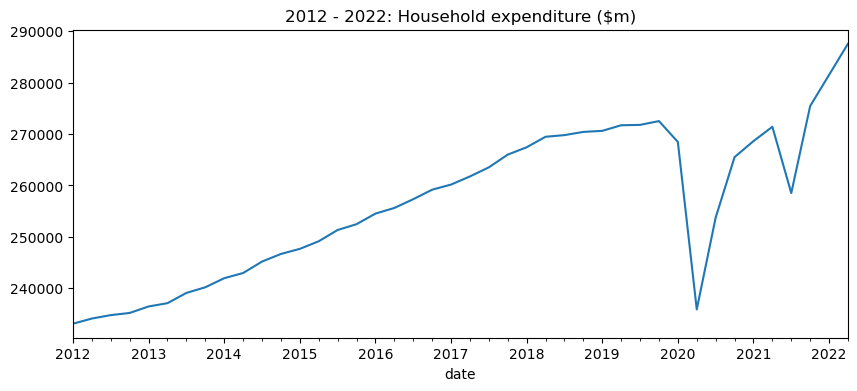

In [12]:
#plot household expenditure
#output the plot as jpg file into Diagram folder
df_spending.plot(figsize=(10,4), legend = None, title = "2012 - 2022: Household expenditure ($m)")


plt.savefig ("./Diagram/spendingtrend.jpg")

### Household expenditure by category and year

In [13]:
#remove final_consumption
df_spending_cat = df_hfce.drop(columns = "final_consumption")

In [14]:
#calculate the yearly average spending for each category
df_mean = df_spending_cat.groupby(df_spending_cat.index.year).mean()
df_mean

,food,tobacco,alcohol,clothing,rent,power,household,health,purchase_vehicle,operation_vehicle,transport,communication,recreation,education,hotel,insurance,other
date,,,,,,,,,,,,,,,,,
2012,22016.50,8638.25,4893.75,7153.75,48368.25,6528.25,9572.25,14490.25,5033.50,13207.75,8927.50,2902.00,23289.75,11826.75,16510.50,19281.25,14286.25
2013,22824.00,8421.50,4859.25,7505.25,49363.25,6290.00,9955.50,14891.00,5410.50,13559.00,8606.50,3091.50,22943.75,12180.50,16424.75,19526.75,14534.25
2014,23048.75,7812.25,5037.50,7670.25,50399.75,6218.00,10438.00,15453.75,5468.50,13457.50,7983.00,3507.00,23843.75,12370.25,17521.75,20495.25,14951.00
2015,23554.75,7173.50,5065.50,8092.75,51514.00,6377.50,11009.25,15918.75,5841.75,13408.00,8115.25,3935.75,24457.25,12497.25,17715.50,20939.75,15389.50
2016,24367.75,6658.50,5262.25,8541.50,52742.00,6510.75,11323.50,16383.50,5922.00,13256.75,8285.25,4463.25,24841.50,12820.00,18183.75,21669.75,15832.50
2017,25166.50,6560.75,5312.50,8802.75,53991.00,6606.25,11571.00,17059.25,6050.25,13546.25,8429.00,4775.50,25321.75,13028.75,18574.00,22253.00,16078.25
2018,25975.75,6416.00,5401.25,9314.00,55215.50,6594.50,11981.00,17761.75,5942.50,13603.00,8708.00,5023.00,26291.00,13321.00,19162.25,22275.00,16413.75
2019,26321.00,5900.25,5370.50,9568.00,56325.00,6577.00,11893.75,18429.50,5610.25,13641.50,8775.25,5194.50,26524.75,13528.75,19267.25,22031.00,16765.75
2020,27664.75,5144.75,6052.50,8797.75,57295.00,6864.75,12976.00,17737.00,5299.00,11490.50,3040.50,5460.00,25102.25,13779.25,13098.25,21863.00,14221.00


In [15]:
#convert df spending by category in amount to spending by categary in percentage
df_mean_percentage = df_mean.transform(lambda x: round(100 * x / df_mean.sum(axis = 1),2))
df_mean_percentage

,food,tobacco,alcohol,clothing,rent,power,household,health,purchase_vehicle,operation_vehicle,transport,communication,recreation,education,hotel,insurance,other
date,,,,,,,,,,,,,,,,,
2012,9.29,3.65,2.07,3.02,20.41,2.76,4.04,6.12,2.12,5.57,3.77,1.22,9.83,4.99,6.97,8.14,6.03
2013,9.49,3.50,2.02,3.12,20.53,2.62,4.14,6.19,2.25,5.64,3.58,1.29,9.54,5.07,6.83,8.12,6.05
2014,9.38,3.18,2.05,3.12,20.51,2.53,4.25,6.29,2.23,5.48,3.25,1.43,9.71,5.04,7.13,8.34,6.09
2015,9.38,2.86,2.02,3.22,20.52,2.54,4.39,6.34,2.33,5.34,3.23,1.57,9.74,4.98,7.06,8.34,6.13
2016,9.48,2.59,2.05,3.32,20.52,2.53,4.40,6.37,2.30,5.16,3.22,1.74,9.66,4.99,7.07,8.43,6.16
2017,9.56,2.49,2.02,3.35,20.52,2.51,4.40,6.48,2.30,5.15,3.20,1.81,9.62,4.95,7.06,8.46,6.11
2018,9.64,2.38,2.00,3.46,20.50,2.45,4.45,6.59,2.21,5.05,3.23,1.86,9.76,4.94,7.11,8.27,6.09
2019,9.69,2.17,1.98,3.52,20.73,2.42,4.38,6.78,2.06,5.02,3.23,1.91,9.76,4.98,7.09,8.11,6.17
2020,10.81,2.01,2.37,3.44,22.39,2.68,5.07,6.93,2.07,4.49,1.19,2.13,9.81,5.38,5.12,8.54,5.56


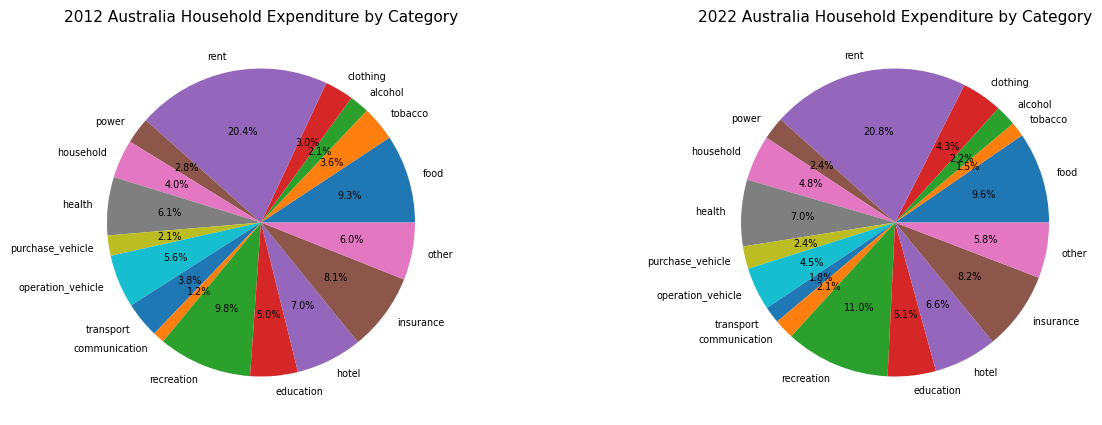

In [18]:
# plot house expenditures by category
# output the pie charts to Diagram folder as .jpg
fig, axs = plt.subplots(1,2, figsize = (15,5))

#plot 1
axs[0].pie(df_mean.loc[2012], autopct = '%1.1f%%', textprops={'size': 'x-small'}, labels = df_mean.columns)
axs[0].set_title ("2012 Australia Household Expenditure by Category", fontsize = 11)

#plot 2
axs[1].pie(df_mean.loc[2022], autopct = '%1.1f%%',textprops={'size': 'x-small'}, labels = df_mean.columns)
axs[1].set_title ("2022 Australia Household Expenditure by Category", fontsize = 11)

plt.show()

In [32]:
df_mean_percentage.T.hvplot.bar(rot=90).opts(width = 2000, height = 400).opts(title = "2012-2022 : Australia Household expenditure by year and category")

:Bars   [index,date]   (value)